**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Introducción al Aprendizaje profundo**

*Edición 2023*

----

# Trabajo práctico entregable

Dado el dataset que busca predecir la [presencia o ausencia de Diabetes](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data?select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv).

## Ejercicio 1 - Visualización de los Datos

Realizar una pequeña inspección del dataset que busque entender de qué se trata el dataset y el 
problema a resolver. La idea es inspeccionar no realizar un EDA completo, pueden valerse de 
herramientas que simplifiquen o realicen esta tarea, dilemas éticos, etc. Piense que los datos
pueden ser utilizados para hacer predicciones futuras.

----

### Imports y lectura de datasets

In [8]:
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

#### Lectura del Dataset

In [9]:
data = pd.read_csv('datasets/diabetes.csv')
data.shape

(70692, 22)

In [10]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


#### Atributos del dataset

* **Diabetes_binary**: (Alguna vez le dijeron) que tiene diabetes?.
* **HighBP**: Adults who have been told they have *high blood pressure* by a doctor, nurse, or other health professional .
* **HighChol**: Adults who have been told they have *high cholesterol* by a doctor, nurse, or other health professional .
* **CholCheck**: Cholesterol check within past five years.
* **BMI**: BMI (Body Mass Index) is a measure of body fat based on weight and height.
        Higher BMI values are linked to a higher risk of diabetes. The range of BMI in the dataset
        is from 10.16 to 71.55. BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9
        is overweight, and 30 or more is obese.
* **Smoker**: Have you smoked at least 100 cigarettes in your entire life?.
* **Stroke**: (Ever told) you had a stroke.
* **HeartDiseaseorAttack**: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
* **PhysActivity**: dults who reported doing physical activity or exercise during the past 30 days other than their regular job.
* **Fruits**: Consume Fruit 1 or more times per day.
* **Veggies**: Consume Vegetables 1 or more times per day.
* **HvyAlcoholConsump**: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week).
* **AnyHealthcare**: Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service?.
* **NoDocbcCost**: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?.
* **GenHlth**: Would you say that in general your health is?.
* **MentHlth**: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?.
* **PhysHtlt**: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?.
* **DiffWalk**: Do you have serious difficulty walking or climbing stairs?.
* **Sex**: Indicate sex of respondent.
* **Age**: Fourteen-level age category.
* **Education**: What is the highest grade or year of school you completed?.
* **Income**: Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.")

### Análisis del Dataset
#### Análisis de variables feature

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

En este dataset observamos que no hay datos faltantes y además, todos son de tipo `float`.

In [12]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


También observamos que los datos están expresados en distintas unidades. La mayoría de los features, tal como vimos en la explicación de cada uno es binaria, pero existen atributos tal como `BMI` que tiene su propia escala, `GenHlth`, `MentHlth` y `PhysHlth` que se miden en días, y `Age` y `Education`, que son categóricas, por lo que también será necesario aplicar una *estandarización* de los mismos.

Aparentemente, no existen datos `null` en los registros del dataset, lo cual chequeamos gráficamente con la librería `missingno`:

<Axes: >

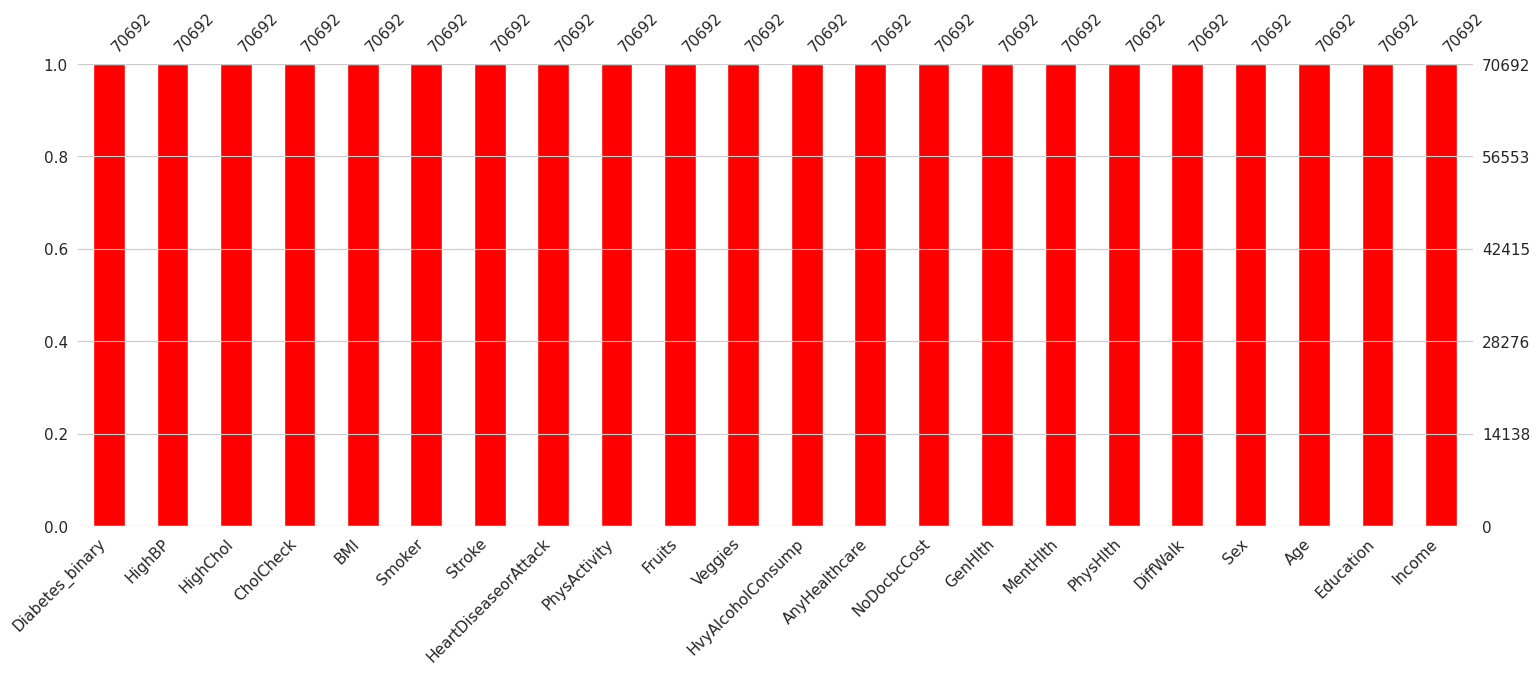

In [13]:
msno.bar(data, figsize=(18, 6), sort='ascending', fontsize=11, color='red')

Analizaremos gráficamente la distribución de los datos de cada una de las columnas `feature` del set de **entrenamiento**, prestando especial atención a la existencia de outliers.

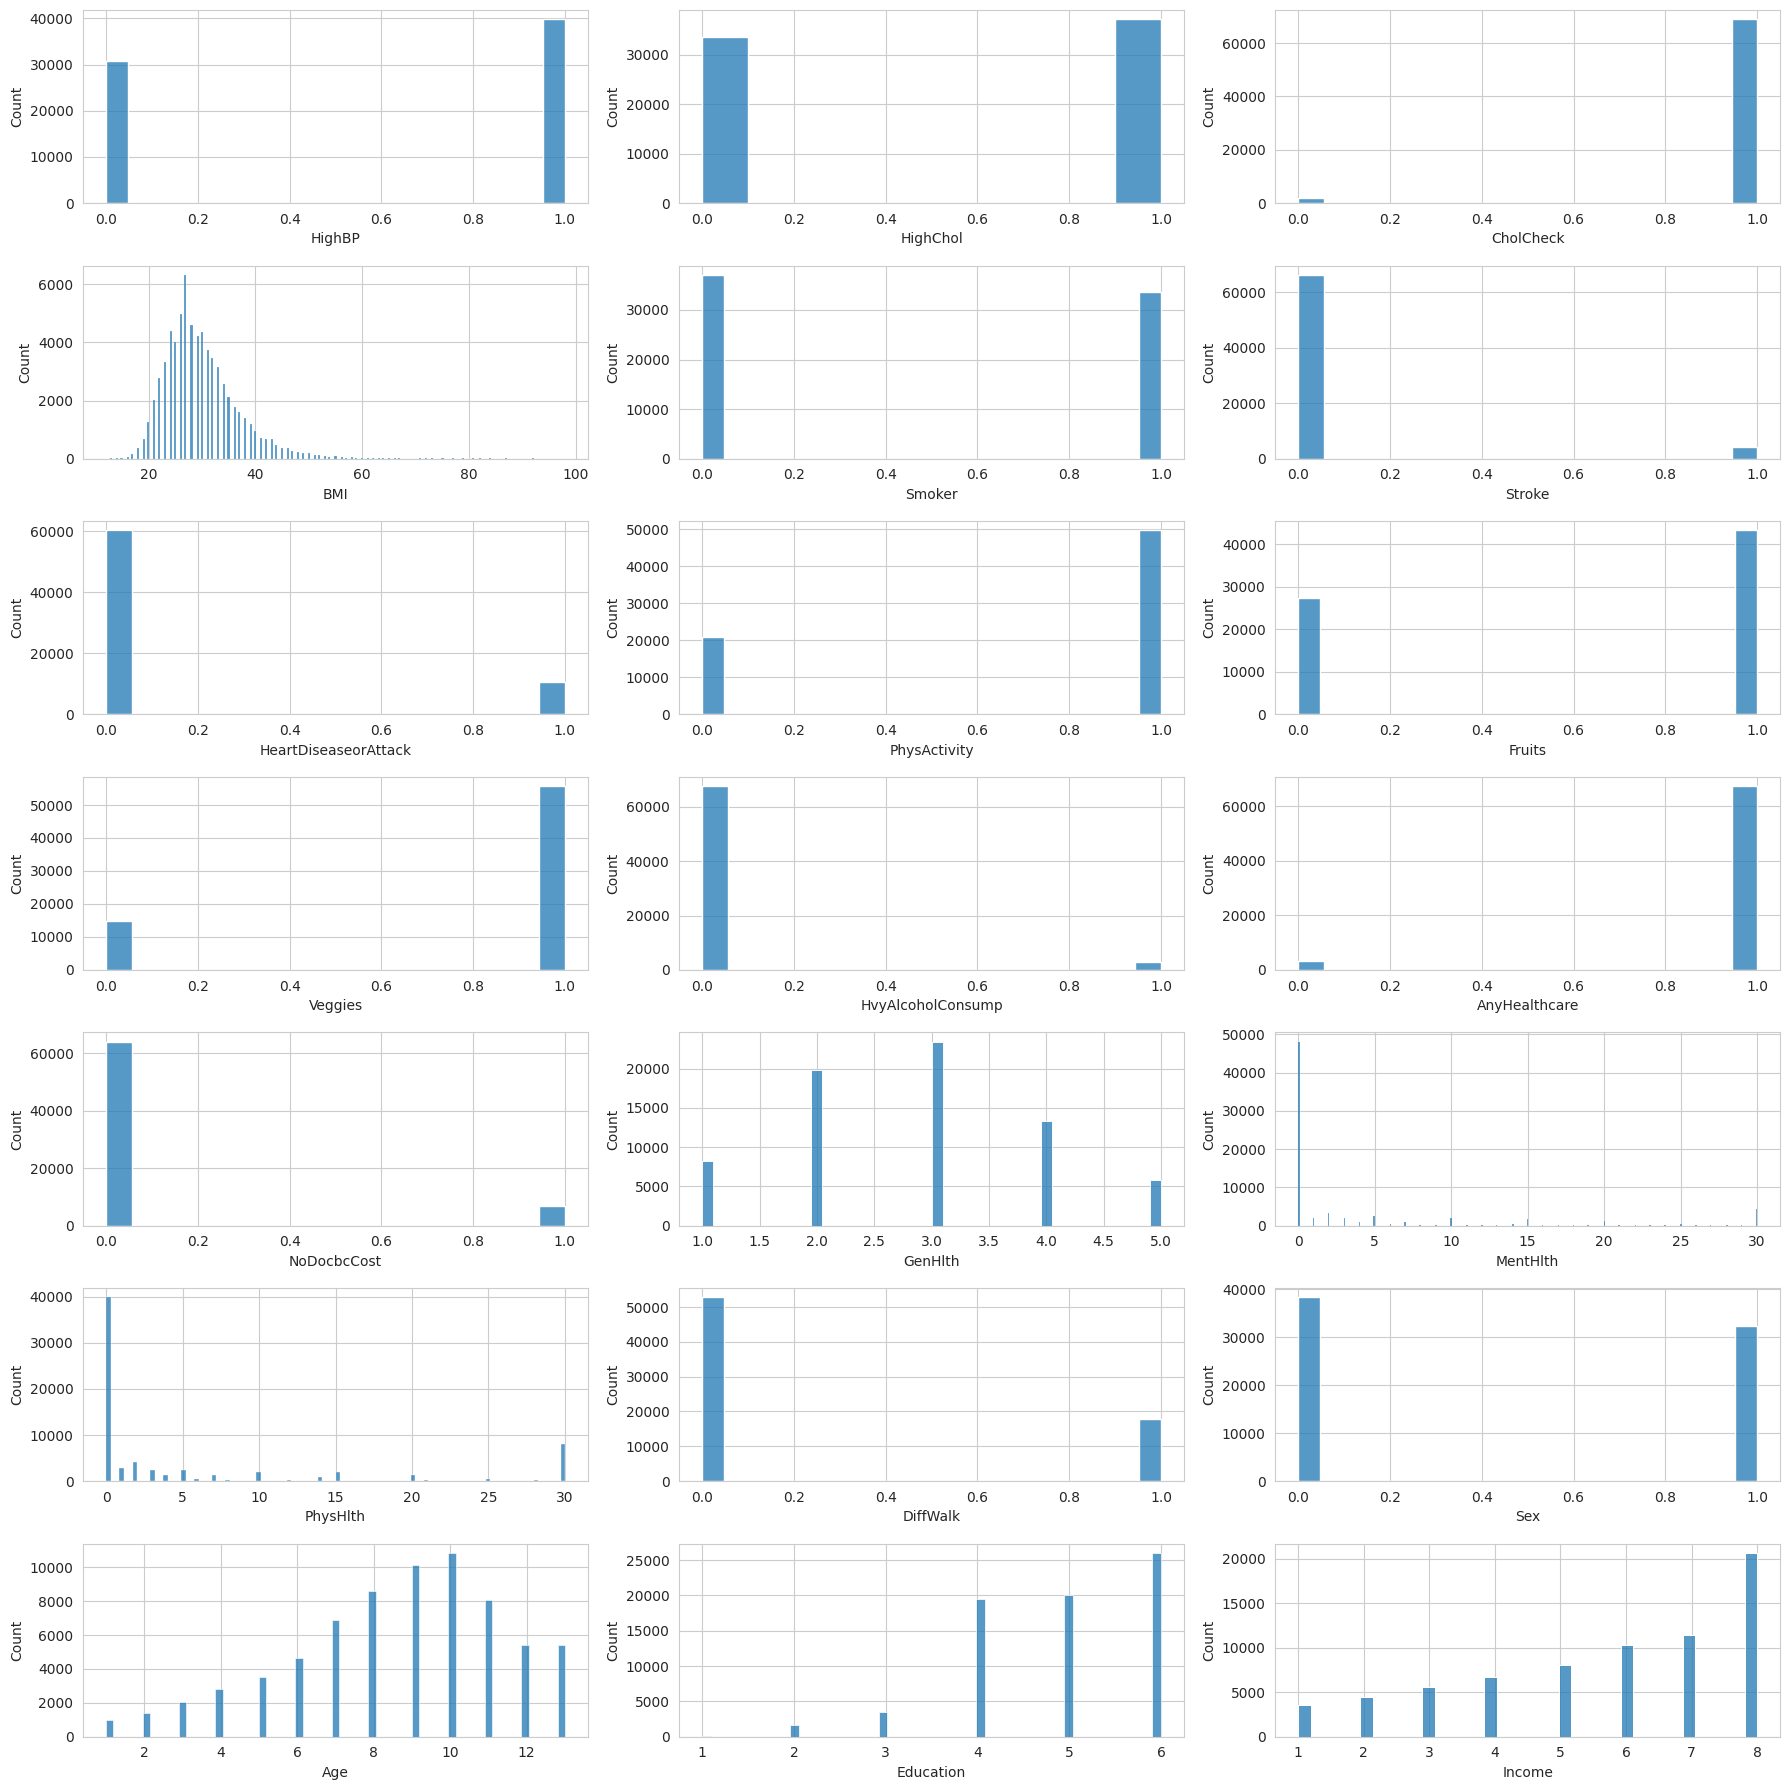

In [14]:
_, axes = plt.subplots(nrows=7, ncols=3, figsize=(18,18))

seaborn.histplot(x=data.HighBP.sort_values(), ax=axes[0][0])

seaborn.histplot(x=data.HighChol.sort_values(), bins=10, ax=axes[0][1])

seaborn.histplot(x=data.CholCheck.sort_values(), ax=axes[0][2])

seaborn.histplot(x=data.BMI.sort_values(), ax=axes[1][0])

seaborn.histplot(x=data.Smoker.sort_values(), ax=axes[1][1])

seaborn.histplot(x=data.Stroke.sort_values(), ax=axes[1][2])

seaborn.histplot(x=data.HeartDiseaseorAttack.sort_values(), ax=axes[2][0])

seaborn.histplot(x=data.PhysActivity.sort_values(), ax=axes[2][1])

seaborn.histplot(x=data.Fruits.sort_values(), ax=axes[2][2])

seaborn.histplot(x=data.Veggies.sort_values(), ax=axes[3][0])

seaborn.histplot(x=data.HvyAlcoholConsump.sort_values(), ax=axes[3][1])

seaborn.histplot(x=data.AnyHealthcare.sort_values(), ax=axes[3][2])

seaborn.histplot(x=data.NoDocbcCost.sort_values(), ax=axes[4][0])

seaborn.histplot(x=data.GenHlth.sort_values(), ax=axes[4][1])

seaborn.histplot(x=data.MentHlth.sort_values(), ax=axes[4][2])

seaborn.histplot(x=data.PhysHlth.sort_values(), ax=axes[5][0])

seaborn.histplot(x=data.DiffWalk.sort_values(), ax=axes[5][1])

seaborn.histplot(x=data.Sex.sort_values(), ax=axes[5][2])

seaborn.histplot(x=data.Age.sort_values(), ax=axes[6][0])

seaborn.histplot(x=data.Education.sort_values(), ax=axes[6][1])

seaborn.histplot(x=data.Income.sort_values(), ax=axes[6][2])

plt.tight_layout()

A simple vista podemos observar la discreticidad de los features, de los cuales la mayoría son binarios. De este subgrupo observamos que algunos se encuentran balanceados y otros no. Tal como se mencionó anteriormente, observamos las variables categóricas, y la única variable que puede tener presencia de valores extremos es `BMI`.

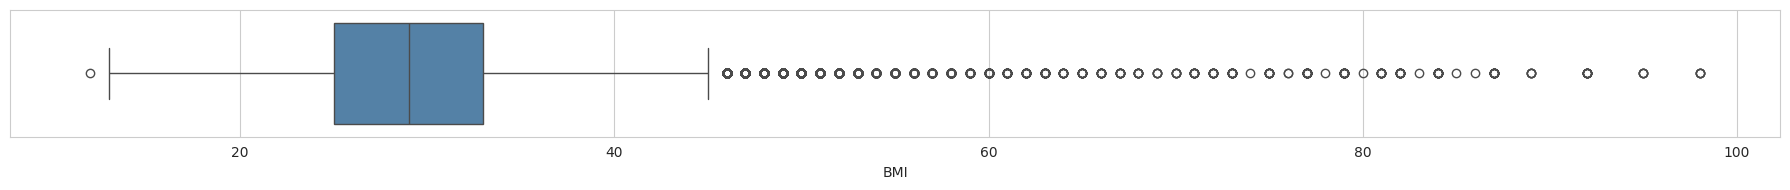

In [19]:
plt.figure(figsize=(18, 2))

seaborn.boxplot(x=data.BMI, color='steelblue')

plt.tight_layout()

Tal como se mencionó anteriormente, la única variable que parece tener outliers es `BMI`, pero teniendo en cuenta que el dataset se encuentra ya *curado* y *filtrado*, se omitirá el análisis de outliers.

#### Análisis de variable objetivo

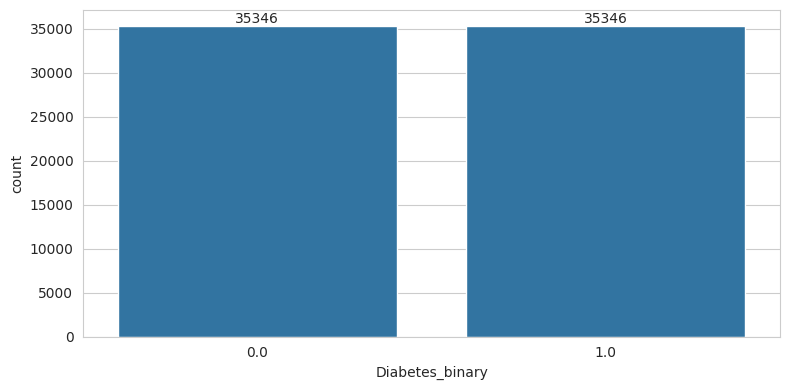

In [35]:
plt.figure(figsize=(8,4))

g = seaborn.countplot(x=data.Diabetes_binary.sort_values())
g.bar_label(container=g.containers[0], labels=data.Diabetes_binary.value_counts())

plt.tight_layout()

En el caso de la variable objetivo observamos que está exactamente balanceada, gracias a esta particularidad, las predicciones futuras serán de buena calidad, a diferencia de lo que sucede cuando la variable objetivo está desbalanceada, afectando el modelo de clasificación y predicción.

#### Análisis de variables de entrada con respecto a la variable objetivo

Haremos un análisis de *correlación* de las variables para poder determinar cómo se relacionan con la variable objetivo y así determinar el orden de importancia.

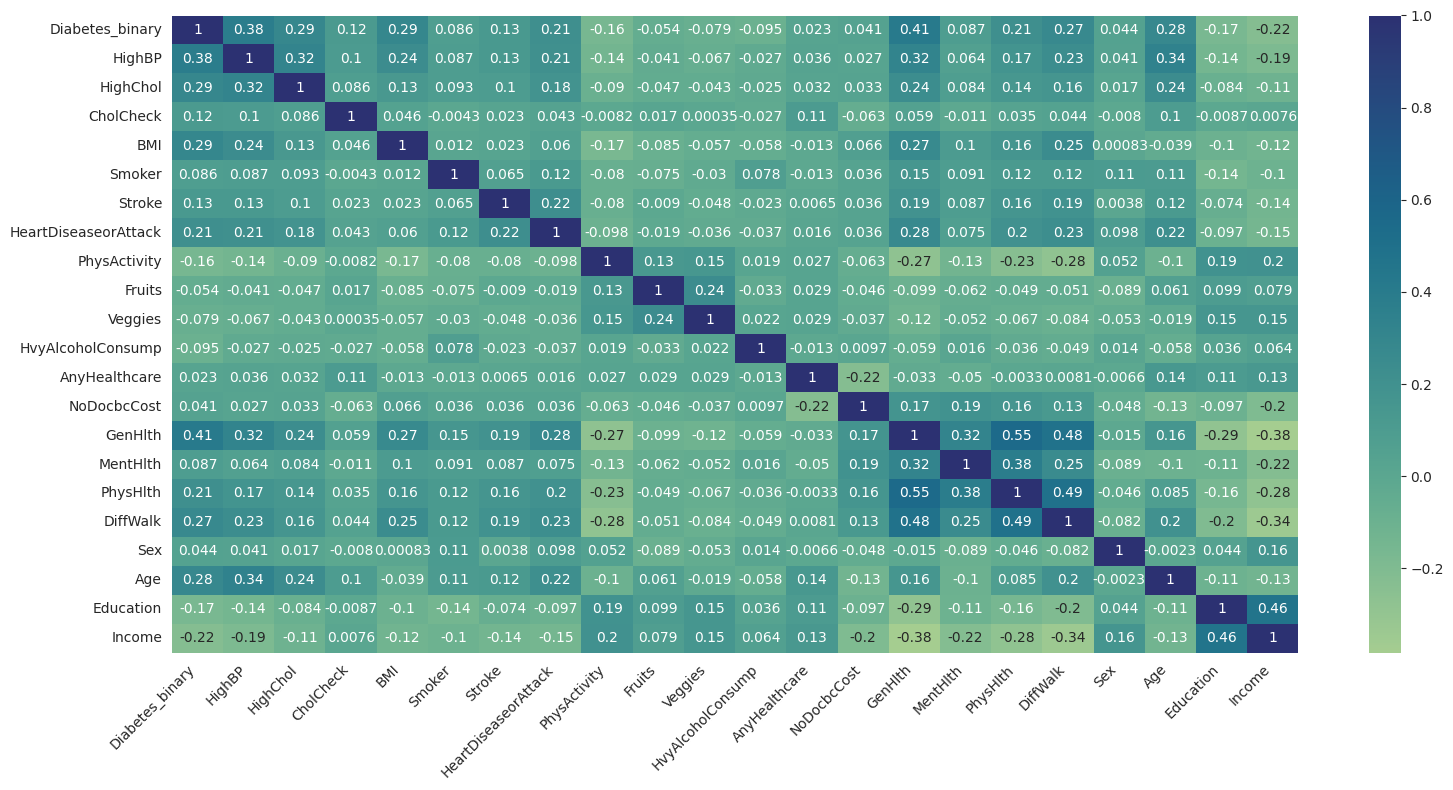

In [36]:
corr_matrix = data.corr()
plt.figure(figsize=(16,8))
seaborn.heatmap(corr_matrix, annot=True, cmap='crest')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

En este mapa de calor encontramos que las features con más incidencia en la variable objetivo son `HighBP`, `HighChol`, `BMI`, `GenHelth`, `DiffWalk` y `Age`. Mientras que se detecta una gran correlación entre las variables `GenHelth`, `MentHelth`, `PhysHelth` y `DiffWalk`, y `Education` e `Income`.